АНАЛИЗ СОБСТВЕННОГО РАСПРЕДЕЛЕНИЯ
f(x) = 3x², 0 ≤ x ≤ 1

АНАЛИТИЧЕСКИЕ ВЫЧИСЛЕНИЯ ХАРАКТЕРИСТИК РАСПРЕДЕЛЕНИЯ

1. ПРОВЕРКА УСЛОВИЯ НОРМИРОВКИ:
   ∫₀¹ f(x)dx = ∫₀¹ 3x² dx
               = [x³]₀¹
               = 1³ - 0³
               = 1 ✓
   Численная проверка: 1.0000000000 (погрешность: 1.11e-14)

2. НАЧАЛЬНЫЕ МОМЕНТЫ:
   Порядок 1: E[X^1] = ∫₀¹ x^1·3x² dx = 3∫₀¹ x^3 dx
               = 3/(1+3) = 3/4 = 0.750000
   Порядок 2: E[X^2] = ∫₀¹ x^2·3x² dx = 3∫₀¹ x^4 dx
               = 3/(2+3) = 3/5 = 0.600000
   Порядок 3: E[X^3] = ∫₀¹ x^3·3x² dx = 3∫₀¹ x^5 dx
               = 3/(3+3) = 1/2 = 0.500000
   Порядок 4: E[X^4] = ∫₀¹ x^4·3x² dx = 3∫₀¹ x^6 dx
               = 3/(4+3) = 3/7 = 0.428571

3. ЦЕНТРАЛЬНЫЕ МОМЕНТЫ:
   Второй центральный момент (дисперсия):
   μ₂ = E[(X-μ)²] = E[X²] - μ²
       = 0.600000 - (0.750000)²
       = 0.600000 - 0.562500
       = 0.037500

   Третий центральный момент:
   μ₃ = E[(X-μ)³] = E[X³] - 3μE[X²] + 2μ³
       = 0.500000 - 3·0.750000·0.600000 + 2·(0.7500

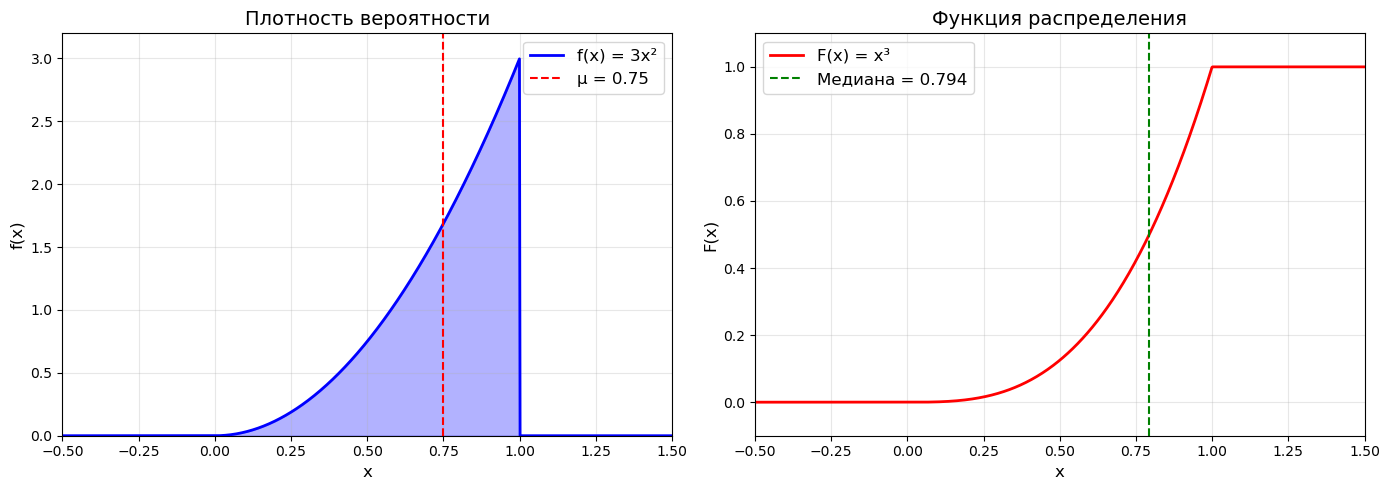


3. ВЕРОЯТНОСТЬ ПОПАДАНИЯ В ИНТЕРВАЛ:
   P(0.2 ≤ X ≤ 0.8) = F(0.8) - F(0.2) = 0.5040
   P(0 ≤ X ≤ 0.5) = F(0.5) - F(0) = 0.1250
   P(0.75 ≤ X ≤ 1.0) = F(1.0) - F(0.75) = 0.5781

4. ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ (используя встроенные методы):
   Математическое ожидание: μ = 0.7500
   Дисперсия: σ² = 0.037500
   Среднее квадратическое отклонение: σ = 0.193649

5. КВАНТИЛИ (используя встроенные методы):
   Квантиль уровня 0.25: x_0.25 = 0.6300
   Квантиль уровня 0.50: x_0.5 = 0.7937
   Квантиль уровня 0.75: x_0.75 = 0.9086
   Квантиль уровня 0.95: x_0.95 = 0.9830

6. КОЭФФИЦИЕНТЫ ФОРМЫ (используя встроенные методы):
   Коэффициент асимметрии: γ₁ = -0.860663
   Эксцесс (избыточный): γ₂ = 0.095238

7. ГЕНЕРАЦИЯ СЛУЧАЙНОЙ ВЫБОРКИ И ПРОВЕРКА:
   Размер выборки: 100000
   Выборочное среднее: 0.7501 (теоретическое: 0.7500)
   Выборочная дисперсия: 0.037460 (теоретическая: 0.037500)
   Выборочная асимметрия: -0.8631 (теоретическая: -0.8607)
   Выборочный эксцесс: 0.0976 (теоретический: 0.0952)


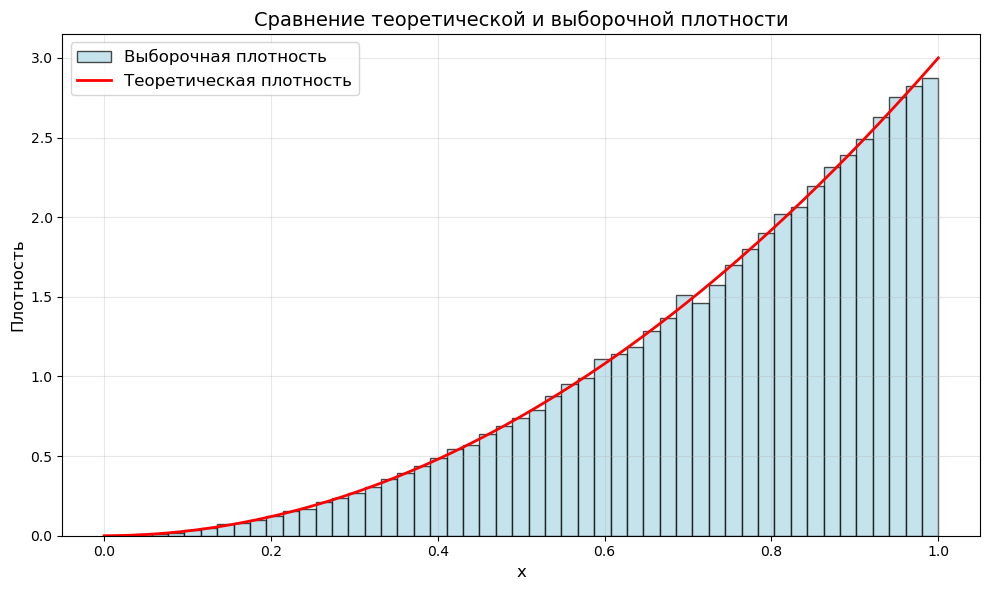


8. СВОДНАЯ ТАБЛИЦА ХАРАКТЕРИСТИК РАСПРЕДЕЛЕНИЯ:
                     Характеристика            Аналитическая формула   Значение
         Плотность вероятности f(x)                              3x² f(x) = 3x²
         Функция распределения F(x)                               x³  F(x) = x³
                Область определения                        0 ≤ x ≤ 1     [0, 1]
         Условие нормировки ∫f(x)dx           ∫₀¹ 3x²dx = [x³]₀¹ = 1          1
       Математическое ожидание E[X]                ∫₀¹ x·3x²dx = 3/4       0.75
      Второй начальный момент E[X²]               ∫₀¹ x²·3x²dx = 3/5        0.6
                   Дисперсия Var(X)   E[X²] - (E[X])² = 3/5 - (3/4)²   0.037500
Среднее квадратическое отклонение σ                √Var(X) = √(3/80)   0.193649
       Третий центральный момент μ₃            E[X³] - 3μE[X²] + 2μ³  -0.006250
    Четвертый центральный момент μ₄ E[X⁴] - 4μE[X³] + 6μ²E[X²] - 3μ⁴   0.004353
          Коэффициент асимметрии γ₁                            μ₃/σ³  -

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate, optimize
import pandas as pd
from scipy.stats import rv_continuous
from fractions import Fraction

class CustomDistribution(rv_continuous):
    """
    Собственное распределение непрерывной случайной величины.
    Плотность вероятности: f(x) = 3x², 0 ≤ x ≤ 1, иначе 0
    """
    
    def __init__(self):
        """
        Инициализация распределения с указанием границ
        """
        super().__init__(a=0, b=1)
        self.name = "CustomDistribution"
        
        self._calculate_moments()
        
    def _calculate_moments(self):
        """
        Вычисляет основные моменты распределения аналитически
        """        
        # Начальные моменты: E[X^k] = ∫₀¹ x^k * 3x² dx = 3∫₀¹ x^(k+2) dx = 3/(k+3)
        self._raw_moments = {}
        for k in range(1, 6):  # Вычисляем моменты до 5-го порядка для всех расчетов
            self._raw_moments[k] = 3 / (k + 3)
        
        # Математическое ожидание (первый начальный момент)
        self._mean = self._raw_moments[1]
        
        # Второй начальный момент
        self._raw_second = self._raw_moments[2]
        
        # Дисперсия: Var(X) = E[X²] - (E[X])²
        self._variance = self._raw_second - self._mean**2
        
        # Среднее квадратическое отклонение
        self._std = np.sqrt(self._variance)
        
        # Третий центральный момент
        # μ₃ = E[(X-μ)³] = E[X³] - 3μE[X²] + 2μ³
        self._raw_third = self._raw_moments[3]
        self._central_moment_3 = (self._raw_third - 3 * self._mean * self._raw_second 
                                  + 2 * self._mean**3)
        
        # Четвертый центральный момент
        # μ₄ = E[(X-μ)⁴] = E[X⁴] - 4μE[X³] + 6μ²E[X²] - 3μ⁴
        self._raw_fourth = self._raw_moments[4]
        self._central_moment_4 = (self._raw_fourth - 4 * self._mean * self._raw_third 
                                  + 6 * self._mean**2 * self._raw_second 
                                  - 3 * self._mean**4)
        
        # Коэффициент асимметрии: γ₁ = μ₃ / σ³
        self._skewness = self._central_moment_3 / (self._std**3)
        
        # Эксцесс (избыточный): γ₂ = μ₄ / σ⁴ - 3
        self._excess_kurtosis = self._central_moment_4 / (self._std**4) - 3
        
        # Третий и четвертый центральные моменты
        self._central_moment_3_alt = self._calculate_central_moment(3)
        self._central_moment_4_alt = self._calculate_central_moment(4)
        
    def _calculate_central_moment(self, k):
        """
        Вычисляет центральный момент порядка k через интеграл
        """
        def integrand(x):
            return (x - self._mean)**k * self._pdf_single(x)
        
        result, _ = integrate.quad(integrand, 0, 1)
        return result
    
    def _pdf_single(self, x):
        """
        Плотность вероятности для одиночного значения
        """
        if 0 <= x <= 1:
            return 3 * x**2
        else:
            return 0.0
    
    def _pdf(self, x):
        """
        Переопределяем метод плотности вероятности
        """
        mask = (x >= 0) & (x <= 1)
        result = np.zeros_like(x, dtype=float)
        result[mask] = 3 * x[mask]**2
        return result
    
    def _cdf(self, x):
        """
        Переопределяем функцию распределения
        Для f(x) = 3x², F(x) = x³
        """
        result = np.zeros_like(x, dtype=float)
        mask = (x >= 0) & (x <= 1)
        result[mask] = x[mask]**3
        result[x > 1] = 1
        return result
    
    def _ppf(self, q):
        """
        Обратная функция распределения (квантильная функция)
        F(x) = x³, поэтому F⁻¹(q) = q^(1/3)
        """
        return np.power(q, 1/3)
    
    def _get_support(self):
        """
        Возвращает носитель распределения (область определения плотности)
        """
        return (0, 1)
    
    def _stats(self):
        """
        Возвращает числовые характеристики распределения:
        (среднее, дисперсию, асимметрию, эксцесс)
        Вычисления производятся аналитически
        """
        return self._mean, self._variance, self._skewness, self._excess_kurtosis
    
    def analytical_calculations(self):
        """
        Выполняет аналитические вычисления всех характеристик распределения
        и выводит результаты
        """
        print("\n" + "="*60)
        print("АНАЛИТИЧЕСКИЕ ВЫЧИСЛЕНИЯ ХАРАКТЕРИСТИК РАСПРЕДЕЛЕНИЯ")
        print("="*60)
        
        print("\n1. ПРОВЕРКА УСЛОВИЯ НОРМИРОВКИ:")
        print("   ∫₀¹ f(x)dx = ∫₀¹ 3x² dx")
        print("               = [x³]₀¹")
        print("               = 1³ - 0³")
        print("               = 1 ✓")
        
        norm_result, norm_error = integrate.quad(self._pdf_single, 0, 1)
        print(f"   Численная проверка: {norm_result:.10f} (погрешность: {norm_error:.2e})")
        
        print("\n2. НАЧАЛЬНЫЕ МОМЕНТЫ:")
        for k in range(1, 5):
            moment_formula = f"E[X^{k}] = ∫₀¹ x^{k}·3x² dx = 3∫₀¹ x^{k+2} dx"
            moment_value = self._raw_moments[k]
            print(f"   Порядок {k}: {moment_formula}")
            print(f"               = 3/({k}+3) = {Fraction(3, k+3)} = {moment_value:.6f}")
        
        print("\n3. ЦЕНТРАЛЬНЫЕ МОМЕНТЫ:")
        
        print("   Второй центральный момент (дисперсия):")
        print(f"   μ₂ = E[(X-μ)²] = E[X²] - μ²")
        print(f"       = {self._raw_second:.6f} - ({self._mean:.6f})²")
        print(f"       = {self._raw_second:.6f} - {self._mean**2:.6f}")
        print(f"       = {self._variance:.6f}")
        
        print("\n   Третий центральный момент:")
        print(f"   μ₃ = E[(X-μ)³] = E[X³] - 3μE[X²] + 2μ³")
        print(f"       = {self._raw_third:.6f} - 3·{self._mean:.6f}·{self._raw_second:.6f} + 2·({self._mean:.6f})³")
        print(f"       = {self._raw_third:.6f} - {3*self._mean*self._raw_second:.6f} + {2*self._mean**3:.6f}")
        print(f"       = {self._central_moment_3:.6f}")
        
        print(f"   Проверка через интеграл: {self._central_moment_3_alt:.6f}")
        
        print("\n   Четвертый центральный момент:")
        print(f"   μ₄ = E[(X-μ)⁴] = E[X⁴] - 4μE[X³] + 6μ²E[X²] - 3μ⁴")
        print(f"       = {self._raw_fourth:.6f} - 4·{self._mean:.6f}·{self._raw_third:.6f} + 6·({self._mean:.6f})²·{self._raw_second:.6f} - 3·({self._mean:.6f})⁴")
        print(f"       = {self._raw_fourth:.6f} - {4*self._mean*self._raw_third:.6f} + {6*self._mean**2*self._raw_second:.6f} - {3*self._mean**4:.6f}")
        print(f"       = {self._central_moment_4:.6f}")
        
        print(f"   Проверка через интеграл: {self._central_moment_4_alt:.6f}")
        
        print("\n4. КОЭФФИЦИЕНТЫ ФОРМЫ РАСПРЕДЕЛЕНИЯ:")
        
        print("   Коэффициент асимметрии:")
        print(f"   γ₁ = μ₃ / σ³")
        print(f"      = {self._central_moment_3:.6f} / ({self._std:.6f})³")
        print(f"      = {self._central_moment_3:.6f} / {self._std**3:.6f}")
        print(f"      = {self._skewness:.6f}")
        
        print("\n   Эксцесс:")
        print(f"   γ₂ = μ₄ / σ⁴ - 3")
        print(f"      = {self._central_moment_4:.6f} / ({self._std:.6f})⁴ - 3")
        print(f"      = {self._central_moment_4:.6f} / {self._std**4:.6f} - 3")
        print(f"      = {self._central_moment_4 / self._std**4:.6f} - 3")
        print(f"      = {self._excess_kurtosis:.6f}")
        
        # 5. Квантили
        print("\n5. КВАНТИЛИ:")
        print("   Функция распределения: F(x) = x³")
        print("   Обратная функция: F⁻¹(q) = q^(1/3)")
        for q in [0.25, 0.5, 0.75, 0.95]:
            quantile = q**(1/3)
            print(f"   Квантиль уровня {q}: F⁻¹({q}) = {q}^(1/3) = {quantile:.4f}")
    
    def get_summary_table(self):
        """
        Возвращает таблицу с аналитическими формулами и значениями
        """
        data = {
            'Характеристика': [
                'Плотность вероятности f(x)',
                'Функция распределения F(x)',
                'Область определения',
                'Условие нормировки ∫f(x)dx',
                'Математическое ожидание E[X]',
                'Второй начальный момент E[X²]',
                'Дисперсия Var(X)',
                'Среднее квадратическое отклонение σ',
                'Третий центральный момент μ₃',
                'Четвертый центральный момент μ₄',
                'Коэффициент асимметрии γ₁',
                'Эксцесс γ₂'
            ],
            'Аналитическая формула': [
                '3x²',
                'x³',
                '0 ≤ x ≤ 1',
                '∫₀¹ 3x²dx = [x³]₀¹ = 1',
                '∫₀¹ x·3x²dx = 3/4',
                '∫₀¹ x²·3x²dx = 3/5',
                'E[X²] - (E[X])² = 3/5 - (3/4)²',
                '√Var(X) = √(3/80)',
                'E[X³] - 3μE[X²] + 2μ³',
                'E[X⁴] - 4μE[X³] + 6μ²E[X²] - 3μ⁴',
                'μ₃/σ³',
                'μ₄/σ⁴ - 3'
            ],
            'Значение': [
                'f(x) = 3x²',
                'F(x) = x³',
                '[0, 1]',
                '1',
                '0.75',
                '0.6',
                f'{self._variance:.6f}',
                f'{self._std:.6f}',
                f'{self._central_moment_3:.6f}',
                f'{self._central_moment_4:.6f}',
                f'{self._skewness:.6f}',
                f'{self._excess_kurtosis:.6f}'
            ]
        }
        
        return pd.DataFrame(data)

dist = CustomDistribution()

def check_normalization(distribution):
    """
    Проверяет условие нормировки: ∫f(x)dx = 1
    """
    result, error = integrate.quad(distribution._pdf_single, 0, 1)
    return result, error

def plot_distribution(distribution):
    """
    Строит графики плотности вероятности и функции распределения
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    x = np.linspace(-0.5, 1.5, 1000)
    pdf_vals = distribution.pdf(x)
    ax1.plot(x, pdf_vals, 'b-', linewidth=2, label=f'f(x) = 3x²')
    ax1.fill_between(x[x>=0], 0, pdf_vals[x>=0], alpha=0.3, color='blue')
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('f(x)', fontsize=12)
    ax1.set_title('Плотность вероятности', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=12)
    ax1.set_xlim(-0.5, 1.5)
    ax1.set_ylim(0, 3.2)
    
    mean_val = distribution.mean()
    ax1.axvline(x=mean_val, color='red', linestyle='--', linewidth=1.5, 
                label=f'μ = {mean_val:.2f}')
    ax1.legend(fontsize=12)
    
    cdf_vals = distribution.cdf(x)
    ax2.plot(x, cdf_vals, 'r-', linewidth=2, label='F(x) = x³')
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel('F(x)', fontsize=12)
    ax2.set_title('Функция распределения', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=12)
    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(-0.1, 1.1)
    
    # Медиана (квантиль 0.5)
    median = distribution.ppf(0.5)
    ax2.axvline(x=median, color='green', linestyle='--', linewidth=1.5, 
                label=f'Медиана = {median:.3f}')
    ax2.legend(fontsize=12)
    
    plt.tight_layout()
    plt.show()

print("=" * 60)
print("АНАЛИЗ СОБСТВЕННОГО РАСПРЕДЕЛЕНИЯ")
print("f(x) = 3x², 0 ≤ x ≤ 1")
print("=" * 60)

dist.analytical_calculations()

print("\n" + "="*60)
print("ДЕМОНСТРАЦИЯ РАБОТЫ РАСПРЕДЕЛЕНИЯ")
print("="*60)

print("\n1. ПРОВЕРКА УСЛОВИЯ НОРМИРОВКИ:")
norm_result, norm_error = check_normalization(dist)
print(f"   Численная проверка: ∫₀¹ f(x)dx = {norm_result:.10f}")
print(f"   Погрешность вычисления: {norm_error:.2e}")

print("\n2. ГРАФИКИ РАСПРЕДЕЛЕНИЯ:")
plot_distribution(dist)

print("\n3. ВЕРОЯТНОСТЬ ПОПАДАНИЯ В ИНТЕРВАЛ:")
intervals = [(0.2, 0.8), (0, 0.5), (0.75, 1.0)]
for a, b in intervals:
    prob = dist.cdf(b) - dist.cdf(a)
    print(f"   P({a} ≤ X ≤ {b}) = F({b}) - F({a}) = {prob:.4f}")

print("\n4. ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ (используя встроенные методы):")
print(f"   Математическое ожидание: μ = {dist.mean():.4f}")
print(f"   Дисперсия: σ² = {dist.var():.6f}")
print(f"   Среднее квадратическое отклонение: σ = {dist.std():.6f}")

print("\n5. КВАНТИЛИ (используя встроенные методы):")
quantile_levels = [0.25, 0.5, 0.75, 0.95]
for q in quantile_levels:
    quantile_val = dist.ppf(q)
    print(f"   Квантиль уровня {q:.2f}: x_{q} = {quantile_val:.4f}")

print("\n6. КОЭФФИЦИЕНТЫ ФОРМЫ (используя встроенные методы):")
moments = dist.stats(moments='mvsk')  # mean, variance, skewness, kurtosis
print(f"   Коэффициент асимметрии: γ₁ = {moments[2]:.6f}")
print(f"   Эксцесс (избыточный): γ₂ = {moments[3]:.6f}")

print("\n7. ГЕНЕРАЦИЯ СЛУЧАЙНОЙ ВЫБОРКИ И ПРОВЕРКА:")
sample_size = 100000
sample = dist.rvs(size=sample_size)

print(f"   Размер выборки: {sample_size}")
print(f"   Выборочное среднее: {np.mean(sample):.4f} (теоретическое: {dist.mean():.4f})")
print(f"   Выборочная дисперсия: {np.var(sample, ddof=0):.6f} (теоретическая: {dist.var():.6f})")
print(f"   Выборочная асимметрия: {stats.skew(sample):.4f} (теоретическая: {moments[2]:.4f})")
print(f"   Выборочный эксцесс: {stats.kurtosis(sample):.4f} (теоретический: {moments[3]:.4f})")

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(sample, bins=50, density=True, alpha=0.7, color='lightblue', 
        edgecolor='black', label='Выборочная плотность')
x_vals = np.linspace(0, 1, 1000)
ax.plot(x_vals, dist.pdf(x_vals), 'r-', linewidth=2, label='Теоретическая плотность')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('Плотность', fontsize=12)
ax.set_title('Сравнение теоретической и выборочной плотности', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n8. СВОДНАЯ ТАБЛИЦА ХАРАКТЕРИСТИК РАСПРЕДЕЛЕНИЯ:")
df_summary = dist.get_summary_table()
print(df_summary.to_string(index=False))

print("\n9. ПРОВЕРКА АНАЛИТИЧЕСКИХ СООТНОШЕНИЙ:")

print("   1. Проверка производной функции распределения:")
x_test = 0.7
f_analytic = 3 * x_test**2
eps = 1e-7
f_numeric = (dist.cdf(x_test + eps) - dist.cdf(x_test - eps)) / (2*eps)
print(f"      F'({x_test}) аналитически: {f_analytic:.6f}")
print(f"      F'({x_test}) численно: {f_numeric:.6f}")
print(f"      Совпадение: {abs(f_analytic - f_numeric) < 1e-6}")

print("\n   2. Проверка связи F(F⁻¹(q)) = q:")
q_test = 0.7
x_q = dist.ppf(q_test)
f_x_q = dist.cdf(x_q)
print(f"      Для q = {q_test}: F⁻¹(q) = {x_q:.6f}, F({x_q:.6f}) = {f_x_q:.6f}")
print(f"      F(F⁻¹(q)) = q: {abs(f_x_q - q_test) < 1e-10}")

print("\n   3. Проверка формулы для дисперсии:")
e_x2 = dist.moment(2)
e_x = dist.mean()
var_calc = e_x2 - e_x**2
var_theoretical = dist.var()
print(f"      E[X²] = {e_x2:.6f}, (E[X])² = {e_x**2:.6f}")
print(f"      Вычисленная дисперсия: E[X²] - (E[X])² = {var_calc:.6f}")
print(f"      Теоретическая дисперсия: {var_theoretical:.6f}")
print(f"      Совпадение: {abs(var_calc - var_theoretical) < 1e-10}")

print("\n   4. Проверка центральных моментов:")
print("      μ₃ вычислен двумя способами:")
print(f"        Через начальные моменты: {dist._central_moment_3:.6f}")
print(f"        Через интеграл: {dist._central_moment_3_alt:.6f}")
print(f"        Разница: {abs(dist._central_moment_3 - dist._central_moment_3_alt):.2e}")

print("\n      μ₄ вычислен двумя способами:")
print(f"        Через начальные моменты: {dist._central_moment_4:.6f}")
print(f"        Через интеграл: {dist._central_moment_4_alt:.6f}")
print(f"        Разница: {abs(dist._central_moment_4 - dist._central_moment_4_alt):.2e}")